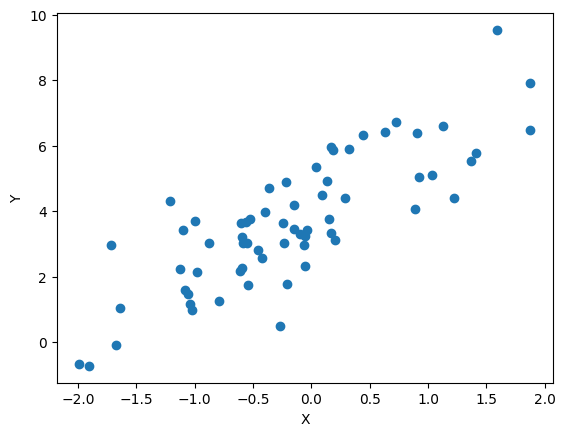

initial weight : [ 1.2622084  -1.26449475  0.67071425  0.30995235  0.1369369   1.32029559
 -1.16274799 -0.50038243 -0.24299448  0.1855142  -0.91330707 -2.0223099
 -0.74056825  1.61986559  0.76448338 -0.73614479 -0.99540004  0.20914169
  0.32849775  1.50249341 -1.5523216  -1.28378343 -0.49697416 -0.26862538
 -0.55056301 -2.95006111  0.79026189 -1.21473221  0.49968716 -0.62987049
  1.16770611  1.28908946 -0.78559987  0.39809169 -0.50495036  1.70144251
  0.35265284  0.57958451 -0.17717332  0.83223297 -1.70771989 -1.8210381
 -1.13582721 -0.90993365 -0.96832904  0.13852108  1.42198656  0.79381639
 -0.57907405 -0.52601437  2.7340987  -0.96341268  0.80845762 -0.24434889
  1.43211591  2.36333834  0.10136141 -1.05673982 -0.69720188 -0.4246052
  2.3944418   1.28761578  1.64069168  0.48988228 -0.58911928]
Original value a =  4  New calculated value w1 =  3.9872129742237474
Original value b =  2  New calculated value w1 =  1.8423691013112962


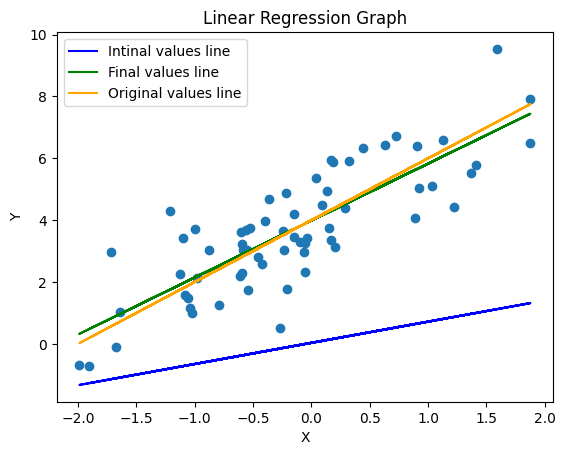

In [3]:
from numpy.random import normal
import matplotlib.pyplot as plt
import random

a = 4  # height
b = 2  # slope

# generate data
N = 65
X = normal(loc=0.0, scale=1.0, size=N)
W = normal(loc=0.0, scale=1.0, size=N)
Y = a + b * X + W

# plot data
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
print("initial weight :", W)

def mean_square_error(X, Y, w1, w2):
    n = len(X)
    total_error = 0

    # running the loop for total numer of samples in dataset
    for i in range(n):
        total_error = total_error + (w1 + w2 * X[i] - Y[i]) ** 2

    mse = total_error / n
    return mse
    # A function that calculates the Gradient/partial derivative of MSE


# We use partial derivatives to find how each individual parameter (w1 and w2)
# affects MSE and to update the values of w1 and w2
def gradient_mean_square_error(X, Y, w1, w2):
    n = len(X)
    partial_derivative_w1 = 0
    partial_derivative_w2 = 0

    # calculate the mse partial derivatives of w1 and w2
    # for number of samples in the dataset as we calculated them above
    for i in range(n):
        partial_derivative_w1 += 2 * (w1 + w2 * X[i] - Y[i])
        partial_derivative_w2 += 2 * (w1 + w2 * X[i] - Y[i]) * X[i]

    # take the mean of w1 and w2 vals
    partial_derivative_w1 = partial_derivative_w1 / n
    partial_derivative_w2 = partial_derivative_w2 / n

    return partial_derivative_w1, partial_derivative_w2
    # This function implements the gradient descent algorithm

def gradient_descent(X, Y, w1, w2, learning_rate, num_iterations):
    mse_list = []

    for i in range(num_iterations):
        partial_derivative_w1, partial_derivative_w2 = gradient_mean_square_error(X, Y, w1, w2)
        w1 -= learning_rate * partial_derivative_w1
        w2 -= learning_rate * partial_derivative_w2

        mse_list.append(mean_square_error(X, Y, w1, w2))
    # return the final calculated derivatives
    return w1, w2, mse_list
initial_w1 = random.uniform(0, 1)
initial_w2 = random.uniform(0, 1)

# define the learning rate and no of iterations we need to calculate
learning_rate = 0.1
iterations = 100

# Perform gradient descent using our implemented gradient descent function
final_w1, final_w2, mse_final_list = gradient_descent(X, Y, initial_w1, initial_w2, learning_rate, iterations)

# Print the original and new calculated values of a and b
print("Original value a = ", a, " New calculated value w1 = ", final_w1)
print("Original value b = ", b, " New calculated value w1 = ", final_w2)


def predict(Y, X, w1, w2):
    Y_pred = []
    for x in X:
        val = w2 * x + w1
        Y_pred.append(val)
    return Y_pred
    plt.figure(figsize=(10, 10))


# plot data as given above
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')

get_preds = predict(Y, X, initial_w1, initial_w2)
plt.plot(X, get_preds, color='b', label="Intinal values line")

get_preds = predict(Y, X, final_w1, final_w2)
plt.plot(X, get_preds, color='g', label="Final values line")

get_preds = predict(Y, X, a, b)
plt.plot(X, get_preds, color='orange', label="Original values line")

# Plot the grpah
plt.title("Linear Regression Graph")
plt.legend()
plt.show()